In [1]:
from bokeh.models import BoxZoomTool
import pandas as pd
import numpy as np

In [2]:
import glob
tics = glob.glob('/run/user/1000/gvfs/smb-share:server=silo.physics.usyd.edu.au,share=silo2/dhey3294/TESS/Searches/TESS_pg/res/*.png')

# Some glomming of files and ids
ticids = [tic.split('/res/')[-1].split('.')[0] for tic in tics]
tic_pg = pd.DataFrame({
    'ID': ticids,
    'files': tics
})

In [3]:
# from tqdm import tqdm

# # We need to chunk up our query because MAST will time-out.. sorry servers!
# chunked_ids = np.array_split(ticids, 100)
# df = Catalogs.query_criteria(catalog="Tic", ID=chunked_ids[0]).to_pandas()
# for chunked_id in tqdm(chunked_ids[1:]):
#     df = df.append(Catalogs.query_criteria(catalog="Tic", ID=chunked_id).to_pandas())

In [4]:
df = pd.read_csv('tic_query.csv', dtype={'ID': str})
# df.to_csv('tic_query.csv')

In [5]:
# # Let's merge our dataframes
# test = df.merge(tic_pg, left_on='ID', right_on='ID')
# mask = (np.isfinite(test['Teff'])) & (np.isfinite(test['lum']))

In [6]:
github_files = [f'https://github.com/danhey/HRDTess/raw/master/data/{ticid}.png' for ticid in ticids]
# tic_pg = pd.DataFrame({
#     'ID': ticids,
#     'files': github_files
# })
test = df.merge(tic_pg, left_on='ID', right_on='ID')
mask = (np.isfinite(test['Teff'])) & (np.isfinite(test['lum']))

In [ ]:
(test[mask]['gaiabp'] - test[mask]['gaiarp']).values

In [53]:
test['b-r'] = test['gaiabp'] - test['gaiarp']
test['absmag'] = test['GAIAmag'].values - 5 * np.log10(1/(test['plx'].values)*1000) + 5

/home/daniel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


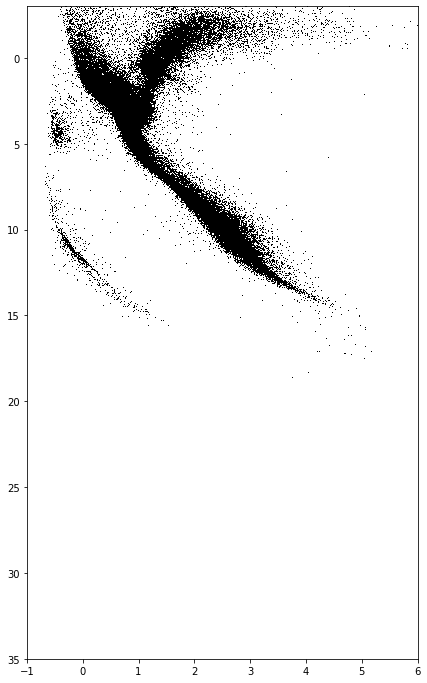

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=[7,12])
plt.plot(test['b-r'], test['absmag'], ',k')
# plt.ylim(3.6, 2.4)
# plt.ylim(35,10)
plt.xlim(-1,6)
plt.ylim(35,-3)
plt.show()


In [ ]:
mask = (np.isfinite(test['Teff'])) & (np.isfinite(test['lum']))

In [58]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool

output_file("index.html")

source = ColumnDataSource(
        data=dict(
            x=test['b-r'].values,
            y=test['absmag'].values,
            imgs = test['files'].values,
            desc = test['ID'].values
        )
    )

hover = HoverTool(# height="200" alt="@imgs" width="500"
        tooltips="""
        <div>
            <div>
                <img
                    src="@imgs"
                    border="2"
                ></img>
            </div>
            <div>
                <span style="font-size: 17px; font-weight: bold;">TIC @desc</span>
            </div>
        </div>
        """
    )

p = figure(#plot_width=900, plot_height=900, 
           tools=[hover, 'zoom_in', 'undo', 'box_zoom', 'reset'],
           title="TESS in the Southern Hemisphere", 
           toolbar_location="above",
           sizing_mode='stretch_both',
           x_range=(-1,6), y_range=(16,-5)
          )

p.circle('x', 'y', 
         radius=0.006,
#          size=7,
         fill_color="firebrick", 
         line_color='black',
         source=source)

p.xaxis.axis_label = 'Gaia BP - RP'
p.yaxis.axis_label = 'Gaia G absolute magnitude'
p.xaxis.axis_label_text_font_size = "18pt"
p.yaxis.axis_label_text_font_size = "18pt"
p.xaxis.major_label_text_font_size = "15pt"
p.yaxis.major_label_text_font_size = "15pt"
p.title.text_font_size = "15pt"

p.xaxis.axis_label_text_font_style = 'normal'
p.yaxis.axis_label_text_font_style = 'normal'

show(p)